# How to find threshold for yellow and white lane
I've passed p4 advanced lane finding, but my algorithm can only worked with project video. When I applied my algorithm with challenge video, the black line on the road can not be distingusihed from lane. The reviewer suggest a piece of code that works very well on the challenge video, which only threshold the yellow and white lane. Sobel filter is not used in the code. This inspired me how should I found the proper threshold get only the yellow and white lane.

Usually there are three color spaces, RGB, HSL and HSV. We can play with them to find the proper threshold. Let's start from the test image.

Import some libraries

In [1]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

Before we can do something, the tools are always important. The following piece code will help a lot. It plots the intensity of one row of image on the image. Let me show you later.

In [19]:
def show_gray(image, title=''):
    plt.figure(figsize=(9,6))
    plt.imshow(image, cmap='gray')
    plt.xlim(0, image.shape[1])
    plt.ylim(image.shape[0], 0)
    if title:
        plt.title(title)
    plt.show()

def show_color(image, title=''):
    plt.figure(figsize=(9,6))
    plt.imshow(image)
    plt.xlim(0, image.shape[1])
    plt.ylim(image.shape[0], 0)
    if title:
        plt.title(title)
    plt.show()
    
def show_overlay(image, loc, ylmt=(0,255), title=''):
    h, w = image.shape[:2]
    fig = plt.figure(figsize=(9,6))
    ax1 = fig.add_subplot(111)
    ax1.imshow(image, 'gray')
    ax1.plot([0, w], [loc, loc],'b', linewidth=4)
    ax1.set_xlim(0, w)
    ax1.set_ylim(h, 0)
    if title:
        ax1.set_title(title)


    ax2 = ax1.twinx()
    ax2.plot(image[loc, :], 'r')
    #ax2.set_ylabel('y2', color='r')
    ax2.set_ylim(ylmt[0], ylmt[1])
    ax2.set_xlim(0, w)

    plt.show()
    

From Udacity course, we already knew it was very convenient to get yellow from HSL colorspace. But what is the proper threshold? Let's find it.

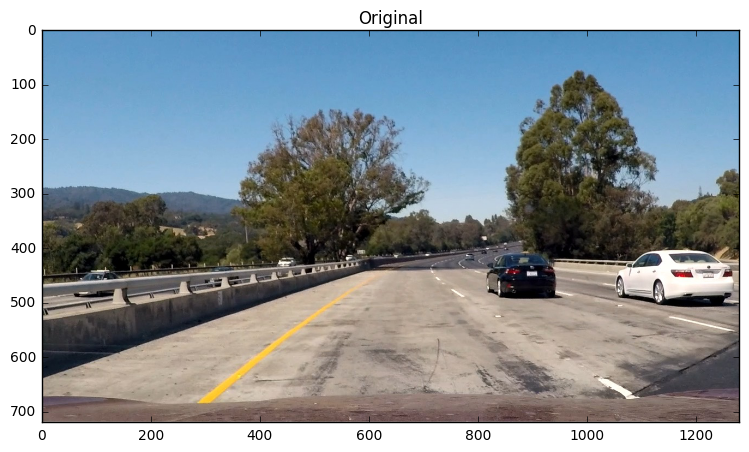

In [20]:
image = np.asarray(Image.open('./test_images/test1.jpg'))
show_color(image, title='Original')

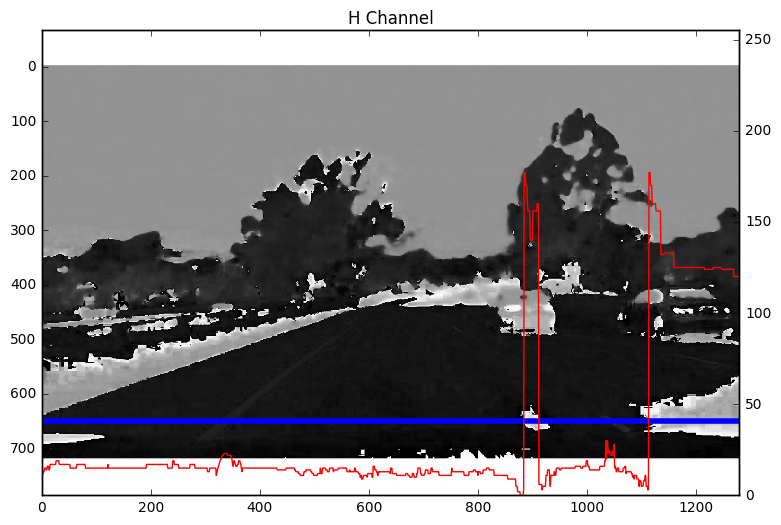

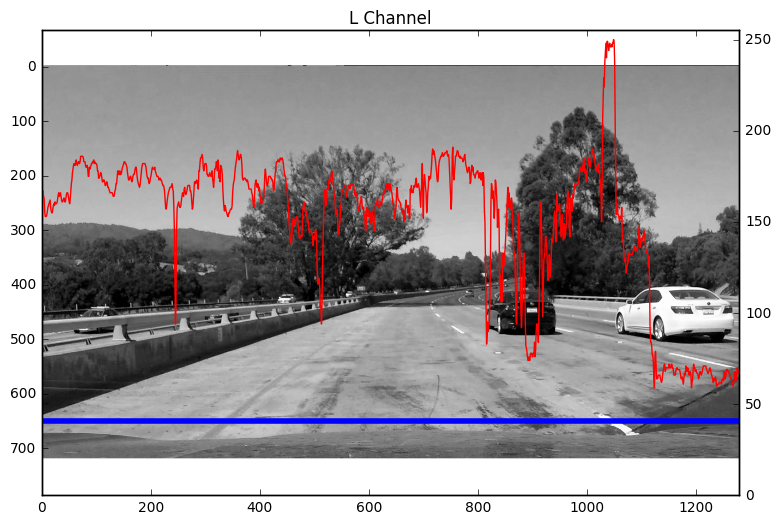

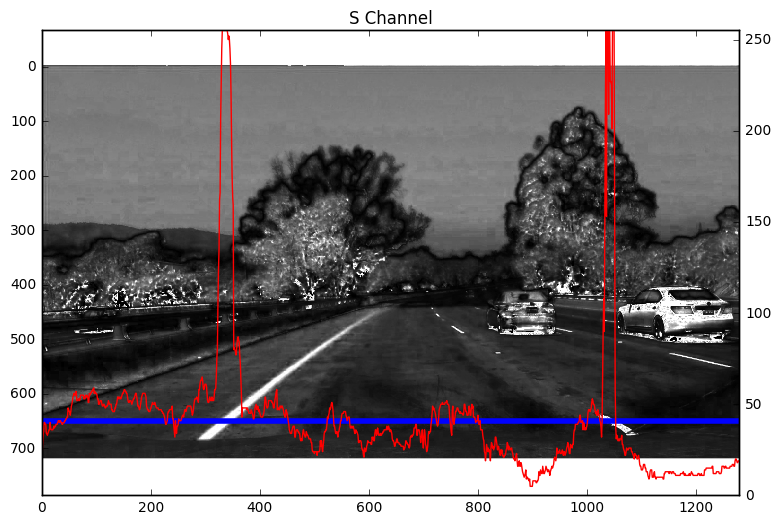

In [21]:
HLS = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
h_channel = HLS[:, :, 0]
l_channel = HLS[:, :, 1]
s_channel = HLS[:, :, 2]

#
show_overlay(h_channel, 650, title='H Channel')
show_overlay(l_channel, 650, title='L Channel')
show_overlay(s_channel, 650, title='S Channel')

The right side of image draws the y axis for intensity. The red line is the intensity of the pixels in blue. In the H Channel picture, both the yellow lane and white lane has intensity lower than 50. In the L Channel picture, the yellow lane has a intensity about 150 and the white lane is about 250. In the S Channel, the yellow lane is 255 and the white is also 255. 

The yellow has value (20, 150, 255). I will try the threshold (10, 0, 200), (40, 200, 255) to get the yellow lane. The (10,0,200) is the lower threshold for the three channel individually. The (40,200,255) is the higher threshold. let's check it.

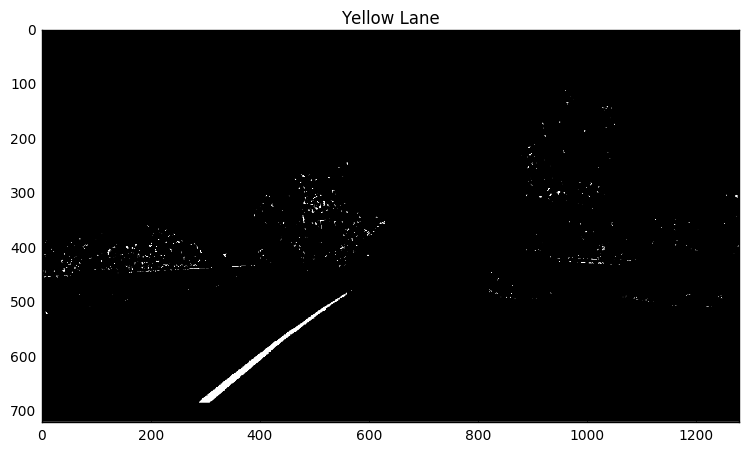

In [22]:
yellow = cv2.inRange(HLS, (10, 0, 200), (40, 200, 255))
show_gray(yellow, 'Yellow Lane')

Excellent, we got only the yellow lane left. How about the white lane? The white lane has HLS value (30, 250, 255). We can try threshold (10, 200, 150) (40, 255, 255).

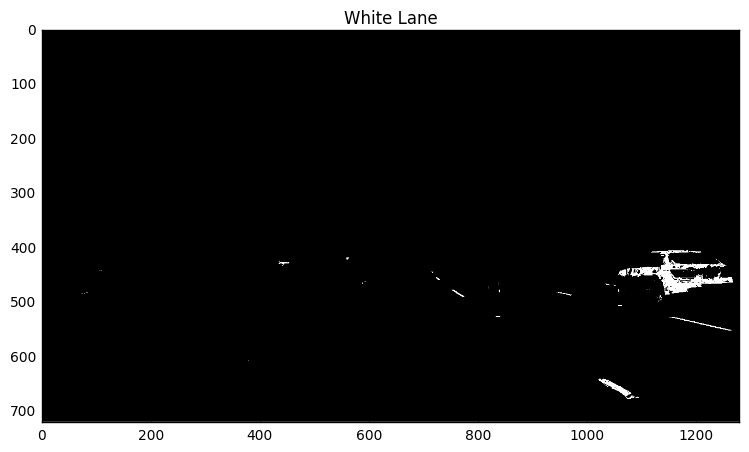

In [24]:
white = cv2.inRange(HLS, (10, 200, 150), (40, 255, 255))
show_gray(white, 'White Lane')

This is what we want, we can combine yellow and white.

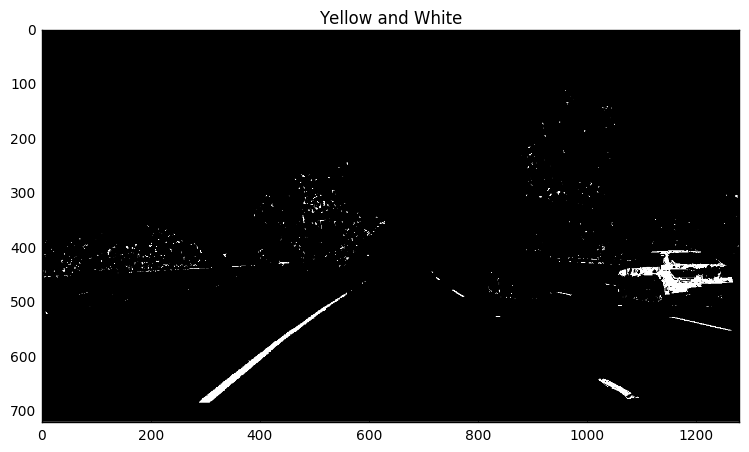

In [27]:
combine = yellow | white
show_gray(combine, 'Yellow and White')